In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
x  = np.linspace(0, 10, 1000)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tan(x)

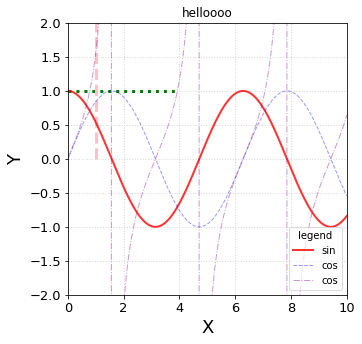

In [9]:
fig = plt.figure(figsize=(5,5))
plt.plot(x,y1, c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
plt.plot(x,y2, c='blue', linestyle='dashed', alpha = 0.4, label='cos', linewidth=1)
plt.plot(x,y3, c='purple', linestyle='-.', alpha = 0.4, label='cos', linewidth=1)
plt.grid(linestyle=':', linewidth =1, alpha=0.5)
plt.hlines(y = 1, xmin = 0, xmax = 4, color='green', linestyle=':', linewidth =3) 
plt.vlines(x = 1, ymin = 0, ymax = 4, color='pink', linestyle='--', linewidth =3) 
plt.xlim(0,10)
plt.ylim(-2,2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('helloooo', loc='center')
plt.legend(loc=4, ncol=1, framealpha=0.7, title='legend', markerscale=0.3)
plt.show()

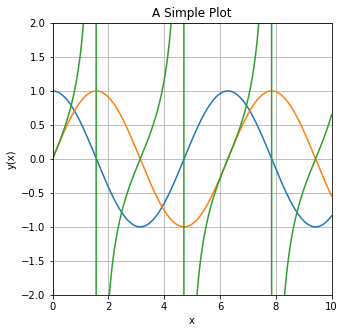

In [10]:

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='y(x)',
       title='A Simple Plot')
plt.grid()
plt.show()

